<font size=5 color='#217638'> <b> QCM Sensor Alcohol Classification using Keras </b> </font> 
<hr/>
[**Tolgahan Cepel**](https://www.kaggle.com/tolgahancepel)
<hr/>
<font color=green>
1. [Overview](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Visualization and Preprocessing](#3)
1. [Building the ANN](#4) 
1. [Visualizing Model Performance](#5)
1. [Conclusion](#6)
<hr/>

## <span id="1"></span> ** 1. Overview **

#### ** Dataset Information **
In the dataset there are 5 types of dataset: QCM3, QCM6, QCM7, QCM10, QCM12 <br>
In each of dataset, There is alcohol classification of five types,
1-octanol, 1-propanol, 2-butanol, 2-propanol, 1-isobutanol <br>
Source: http://archive.ics.uci.edu/ml/datasets/Alcohol+QCM+Sensor+Dataset <br>

#### ** Attribute Information **
The gas sample is passed through the sensor in five different concentrations. These concentrations are, <br>
Concentration Air ratio (ml) Gas ratio (ml) <br>
1 0.799 0.201 <br>
2 0.700 0.300 <br>
3 0.600 0.400 <br>
4 0.501 0.499 <br>
5 0.400 0.600 <br>

There are two channels in the sensor. One of these circles forms channel 1, and the other forms channel 2. MIP and MP ratios used in the QCM sensors are, <br>

Sensor name MIP ratio NP ratio <br>
QCM3 1 1 <br>
QCM6 1 0 <br> 
QCM7 1 0.5 <br> 
QCM10 1 2 <br> 
QCM12 0 1 <br>

#### ** Relevant Paper **
M. Fatih Adak, Peter Lieberzeit, Purim Jarujamrus, Nejat Yumusak, <a href="https://www.sciencedirect.com/science/article/pii/S2215098619303337?via%3Dihub"> Classification of alcohols obtained by QCM sensors with different characteristics using ABC based neural network </a>, Engineering Science and Technology, an International Journal, 2019, , ISSN 2215-0986 

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
sns.set_style('darkgrid')

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
qcm3 = pd.read_csv('/kaggle/input/qcm-sensor-alcohol-dataset/QCM3.csv', sep = ';')
qcm6 = pd.read_csv('/kaggle/input/qcm-sensor-alcohol-dataset/QCM6.csv', sep = ';')
qcm7 = pd.read_csv('/kaggle/input/qcm-sensor-alcohol-dataset/QCM7.csv', sep = ';')
qcm10 = pd.read_csv('/kaggle/input/qcm-sensor-alcohol-dataset/QCM10.csv', sep = ';')
qcm12 = pd.read_csv('/kaggle/input/qcm-sensor-alcohol-dataset/QCM12.csv', sep = ';')

In [3]:
print("Shape of qcm3: ", qcm3.shape)
print("Shape of qcm6: ", qcm6.shape)
print("Shape of qcm7: ", qcm7.shape)
print("Shape of qcm10: ", qcm10.shape)
print("Shape of qcm12: ", qcm12.shape)

Shape of qcm3:  (25, 15)
Shape of qcm6:  (25, 15)
Shape of qcm7:  (25, 15)
Shape of qcm10:  (25, 15)
Shape of qcm12:  (25, 15)


## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

In [4]:
dataset = pd.concat([qcm3, qcm6, qcm7, qcm10, qcm12])
print("Shape of dataset: ", dataset.shape)

Shape of dataset:  (125, 15)


In [5]:
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


The features seem strongly correlated but because of the number of samples aren't much, let's keep them.

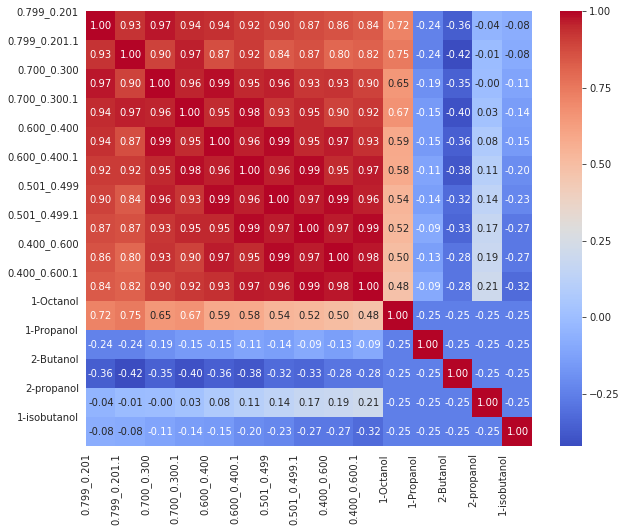

In [6]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Adding a column named "alcohol" for visualization purpose.

In [7]:
dataset.loc[dataset["1-Octanol"] == 1, 'alcohol'] = '1-Octanol'
dataset.loc[dataset["1-Propanol"] == 1, 'alcohol'] = '1-Propanol'
dataset.loc[dataset["2-Butanol"] == 1, 'alcohol'] = '2-Butanol'
dataset.loc[dataset["2-propanol"] == 1, 'alcohol'] = '2-propanol'
dataset.loc[dataset["1-isobutanol"] == 1, 'alcohol'] = '1-isobutanol'

In [8]:
dataset['alcohol'].value_counts()

1-isobutanol    25
1-Propanol      25
2-Butanol       25
2-propanol      25
1-Octanol       25
Name: alcohol, dtype: int64

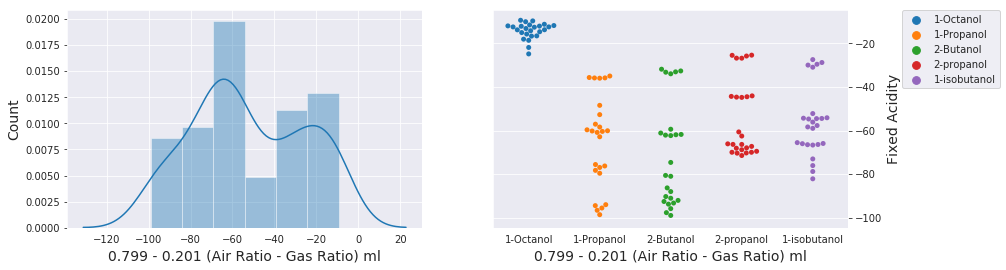

In [9]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.799_0.201'], ax = axes[0])
axes[0].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.799_0.201', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

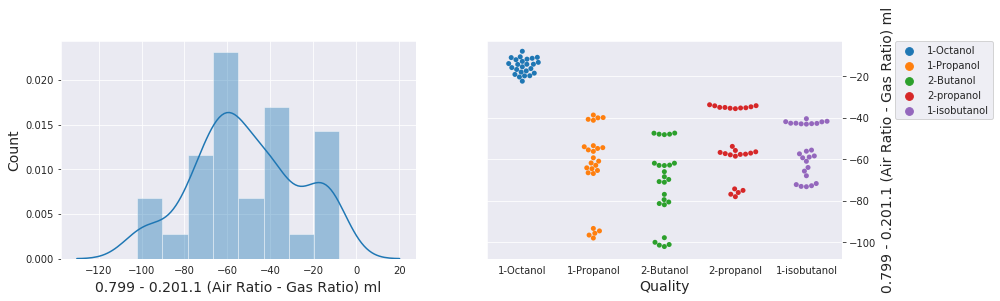

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.799_0.201.1'], ax = axes[0])
axes[0].set_xlabel('0.799 - 0.201.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.799_0.201.1', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.799 - 0.201.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

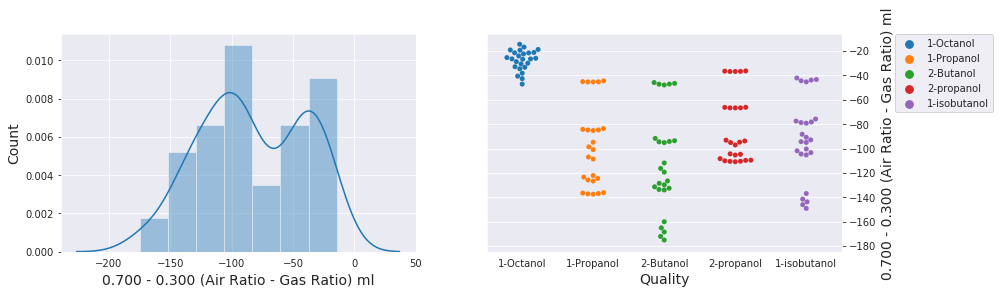

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.700_0.300'], ax = axes[0])
axes[0].set_xlabel('0.700 - 0.300 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.700_0.300', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.700 - 0.300 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

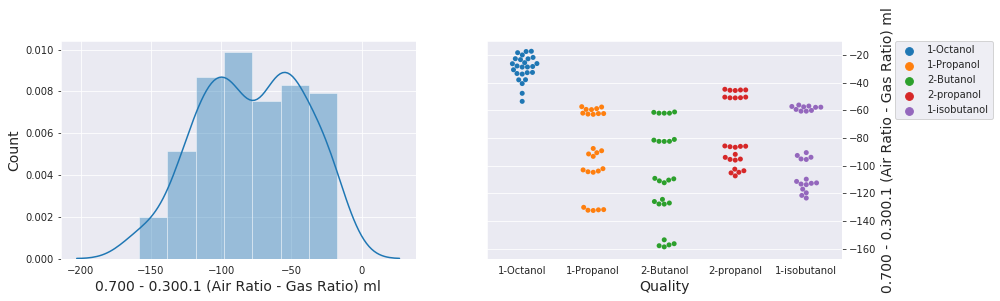

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.700_0.300.1'], ax = axes[0])
axes[0].set_xlabel('0.700 - 0.300.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.700_0.300.1', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.700 - 0.300.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

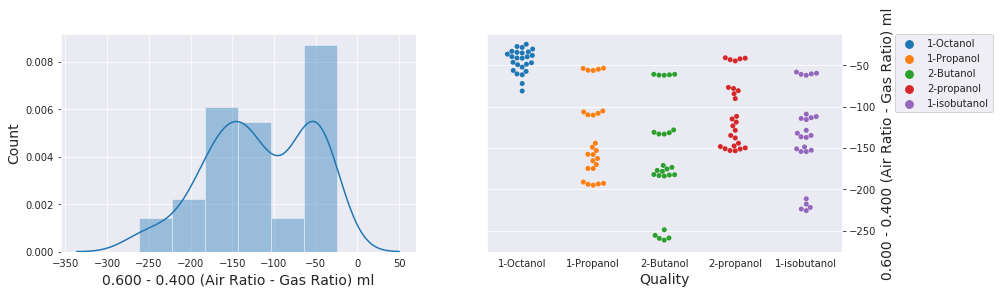

In [13]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.600_0.400'], ax = axes[0])
axes[0].set_xlabel('0.600 - 0.400 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.600_0.400', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.600 - 0.400 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

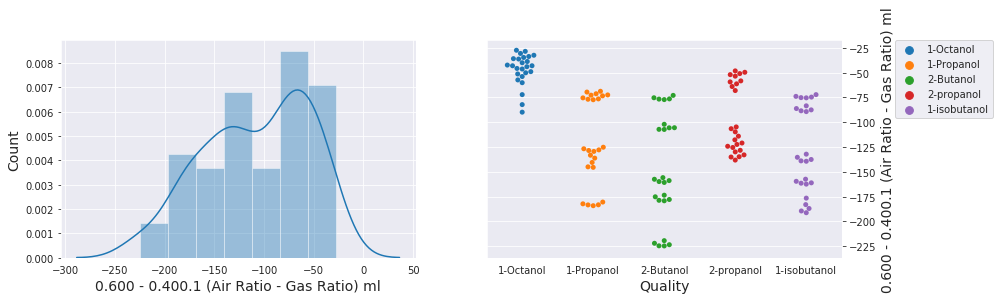

In [14]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.600_0.400.1'], ax = axes[0])
axes[0].set_xlabel('0.600 - 0.400.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.600_0.400.1', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.600 - 0.400.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

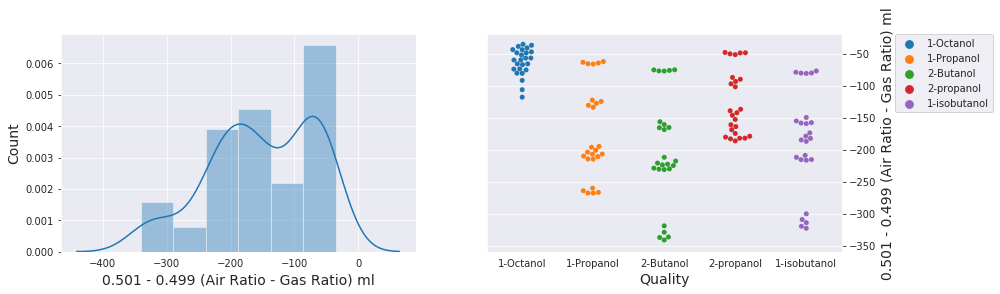

In [15]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.501_0.499'], ax = axes[0])
axes[0].set_xlabel('0.501 - 0.499 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.501_0.499', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.501 - 0.499 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

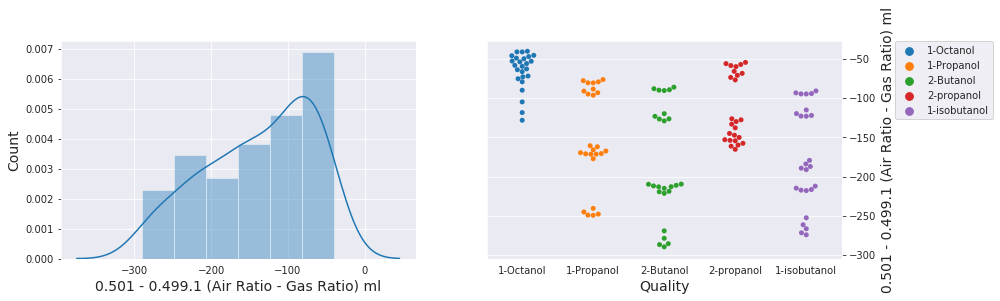

In [16]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.501_0.499.1'], ax = axes[0])
axes[0].set_xlabel('0.501 - 0.499.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.501_0.499.1', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.501 - 0.499.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

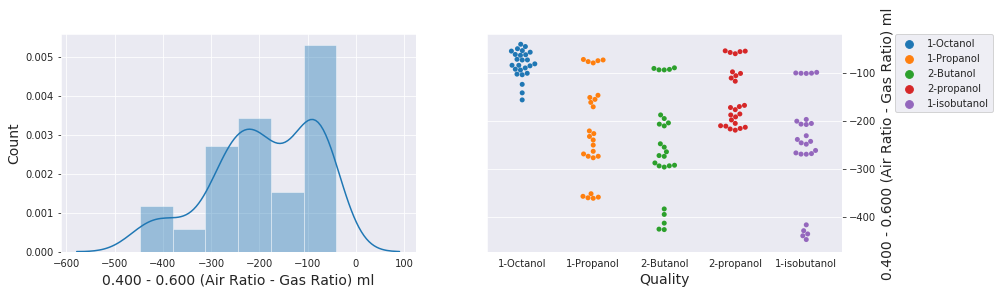

In [17]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.400_0.600'], ax = axes[0])
axes[0].set_xlabel('0.400 - 0.600 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.400_0.600', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.400 - 0.600 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

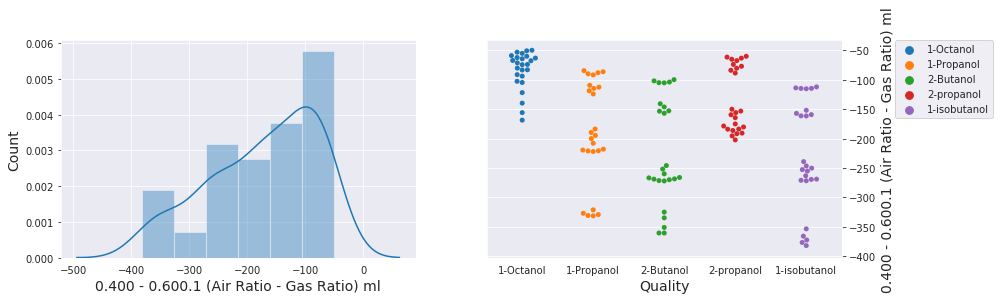

In [18]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['0.400_0.600.1'], ax = axes[0])
axes[0].set_xlabel('0.400 - 0.600.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.400_0.600.1', data = dataset, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('0.400 - 0.600.1 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [19]:
dataset.drop('alcohol', axis = 1, inplace = True)

In [20]:
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


In [21]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, [10,11,12,13,14]].values

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <span id="4"></span> ** 4. Building the ANN **

In [24]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs = 3000, verbose = 1)

Train on 100 samples, validate on 25 samples
Epoch 1/3000
100/100 [==============================] - 1s 8ms/step - loss: 1.6095 - acc: 0.1500 - val_loss: 1.6097 - val_acc: 0.1200
Epoch 2/3000
100/100 [==============================] - 0s 31us/step - loss: 1.6094 - acc: 0.2400 - val_loss: 1.6099 - val_acc: 0.2000
Epoch 3/3000
100/100 [==============================] - 0s 25us/step - loss: 1.6093 - acc: 0.3000 - val_loss: 1.6101 - val_acc: 0.2000
Epoch 4/3000
100/100 [==============================] - 0s 26us/step - loss: 1.6092 - acc: 0.3500 - val_loss: 1.6103 - val_acc: 0.2000
Epoch 5/3000
100/100 [==============================] - 0s 23us/step - loss: 1.6092 - acc: 0.3500 - val_loss: 1.6105 - val_acc: 0.2000
Epoch 6/3000
100/100 [==============================] - 0s 26us/step - loss: 1.6091 - acc: 0.3500 - val_loss: 1.6107 - val_acc: 0.2000
Epoch 7/3000
100/100 [==============================] - 0s 37us/step - loss: 1.6090 - acc: 0.3500 - val_loss: 1.6109 - val_acc: 0.2000
Epoch 8/300

## <span id="5"></span> ** 5. Visualizing Model Performance **

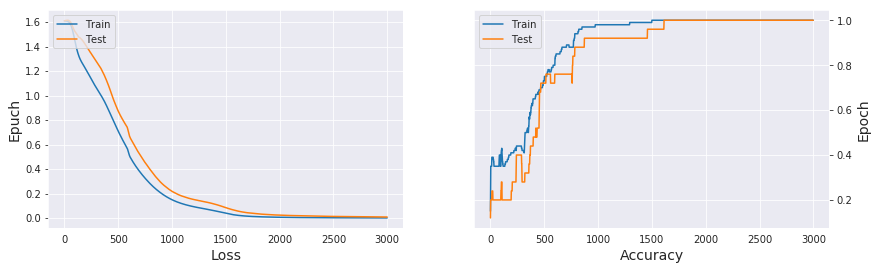

In [25]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = classifier.predict_classes(X_test)
cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)

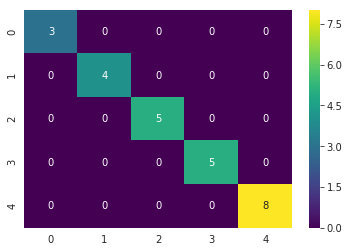

In [27]:
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

## <span id="6"></span> ** 6. Conclusion **

In this kernel, I have built an Artificial Neural Network using Keras on QCM Sensor Alcohol Dataset. Then measured and visualized the confusion matrix. Please make a comment and let me know how to improve model's performance, visualization or something in this kernel. This will also help me on my future works.

<b><font color="red">Don't forget to </font></b> <b><font color="green">UPVOTE </font></b> if you liked this kernel, thank you. 🙂👍